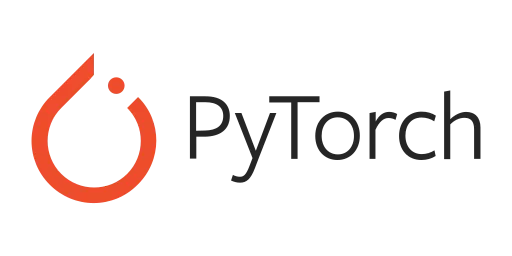

# 파이토치(PyTorch)

* 페이스북이 초기 루아(Lua) 언어로 개발된 토치(Torch)를 파이썬 버전으로 개발하여 2017년도에 공개
* 초기에 토치(Torch)는 넘파이(NumPy) 라이브러리처럼 과학 연산을 위한 라이브러리로 공개
* 이후 GPU를 이용한 텐서 조작 및 동적 신경망 구축이 가능하도록 딥러닝 프레임워크로 발전시킴
* 파이썬답게 만들어졌고, 유연하면서도 가속화된 계산 속도를 제공

## 파이토치의 구성요소

- `torch`: 메인 네임스페이스, 텐서 등의 다양한 수학 함수가 포함
- `torch.autograd`: 자동 미분 기능을 제공하는 라이브러리
- `torch.nn`: 신경망 구축을 위한 데이터 구조나 레이어 등의 라이브러리
- `torch.multiprocessing`: 병럴처리 기능을 제공하는 라이브러리
- `torch.optim`: SGD(Stochastic Gradient Descent)를 중심으로 한 파라미터 최적화 알고리즘 제공
- `torch.utils`: 데이터 조작 등 유틸리티 기능 제공
- `torch.onnx`: ONNX(Open Neural Network Exchange), 서로 다른 프레임워크 간의 모델을 공유할 때 사용

## 텐서(Tensors)

* 데이터 표현을 위한 기본 구조로 텐서(tensor)를 사용
* 텐서는 데이터를 담기위한 컨테이너(container)로서 일반적으로 수치형 데이터를 저장
* 넘파이(NumPy)의 ndarray(다차원행렬)와 유사
* GPU를 사용한 연산 가속 가능

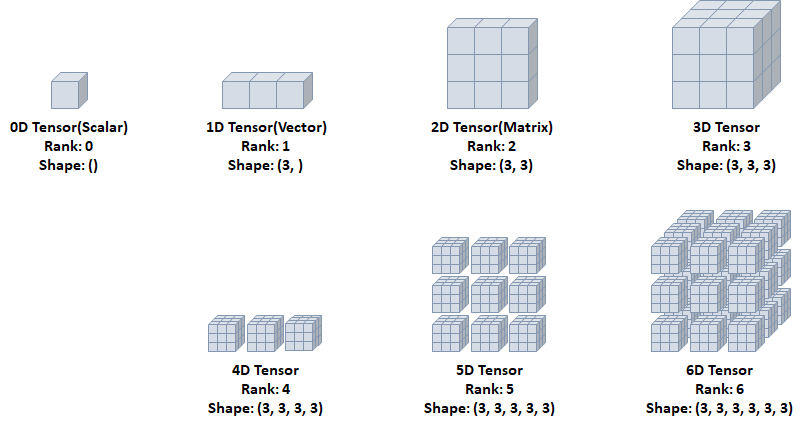

In [ ]:
import torch
#torch.__version__

### 텐서 초기화와 데이터 타입

무작위로 초기화된 텐서

In [ ]:
x = torch.rand(4,2)
print(x)

tensor([[0.2058, 0.7451],
        [0.5887, 0.5235],
        [0.7989, 0.6313],
        [0.0987, 0.3110]])


데이터 타입(dtype)이 long이고, 0으로 채워진 텐서

In [ ]:
x = torch.zeros(4,2,dtype=torch.long)
print(x)

tensor([[0, 0],
        [0, 0],
        [0, 0],
        [0, 0]])


사용자가 입력한 값으로 텐서 초기화

In [ ]:
x = torch.tensor([3, 2.3])
print(x)

tensor([3.0000, 2.3000])


2 x 4 크기, double 타입, 1로 채워진 텐서

In [ ]:
x = x.new_ones(2,4,dtype=torch.double)
print(x)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]], dtype=torch.float64)


x와 같은 크기, float 타입, 무작위로 채워진 텐서

In [ ]:
x = torch.randn_like(x, dtype=torch.float) # 기존과 같지만 타입 변경
print(x)

tensor([[ 0.1898, -1.7862, -0.2382,  0.5512],
        [-3.0006, -0.3524,  0.3529,  2.9490]])


텐서의 크기 계산

### 데이터 타입(Data Type)

| Data type | dtype | CPU tensor | GPU tensor |
| ------ | ------ | ------ | ------ |
| 32-bit floating point | `torch.float32` or `torch.float` |`torch.FloatTensor` | `torch.cuda.FloatTensor` |
| 64-bit floating point | `torch.float64` or `torch.double` |`torch.DoubleTensor` | `torch.cuda.DoubleTensor` |
| 16-bit floating point | `torch.float16` or `torch.half` |`torch.HalfTensor` | `torch.cuda.HalfTensor` |
| 8-bit integer(unsinged) | `torch.uint8` |`torch.ByteTensor` | `torch.cuda.ByteTensor` |
| 8-bit integer(singed) | `torch.int8` |`torch.CharTensor` | `torch.cuda.CharTensor` |
| 16-bit integer(signed) | `torch.int16` or `torch.short` |`torch.ShortTensor` | `torch.cuda.ShortTensor` |
| 32-bit integer(signed) | `torch.int32` or `torch.int` |`torch.IntTensor` | `torch.cuda.IntTensor` |
| 64-bit integer(signed) | `torch.int64` or `torch.long` |`torch.LongTensor` | `torch.cuda.LongTensor` |

In [ ]:
ft = torch.FloatTensor([1,2,3])
print(ft)
print(ft.dtype)

tensor([1., 2., 3.])
torch.float32


In [ ]:
# 데이터 타입 바꾸기

In [ ]:
it = torch.IntTensor([1,2,3])
print(it)
print(it.dtype)

tensor([1, 2, 3], dtype=torch.int32)
torch.int32


### CUDA Tensors

- `.to` 메소드를 사용하여 텐서를 어떠한 장치(cpu, gpu)로도 옮길 수 있음

In [ ]:
x = torch.randn(1)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [ ]:
y = torch.ones_like(x,device=device)
print(y)
x = x.to(device) 
print(x)
z = x + y
print(z)
print(z.to('cpu', torch.double))

tensor([1.], device='cuda:0')
tensor([-0.6471], device='cuda:0')
tensor([0.3529], device='cuda:0')
tensor([0.3529], dtype=torch.float64)


### 다차원 텐서 표현

0D Tensor(Scalar)

* 하나의 숫자를 담고 있는 텐서(tensor)
* 축과 형상이 없음

In [ ]:
t0 = torch.tensor()
print(t0.ndim)
print(t0.shape)
print(t0)

0
torch.Size([])
tensor(0)


1D Tensor(Vector)

* 값들을 저장한 리스트와 유사한 텐서
* 하나의 축이 존재

In [ ]:
t1 = torch.tensor()
print(t1.ndim)
print(t1.shape)
print(t1)

2D Tensor(Matrix)

* 행렬과 같은 모양으로 두개의 축이 존재
* 일반적인 수치, 통계 데이터셋이 해당
* 주로 샘플(samples)과 특성(features)을 가진 구조로 사용

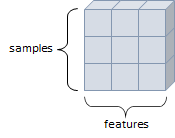

In [ ]:
t2 = torch.tensor()
print(t2.ndim)
print(t2.shape)
print(t2)

3D Tensor

* 큐브(cube)와 같은 모양으로 세개의 축이 존재
* 데이터가 연속된 시퀀스 데이터나 시간 축이 포함된 시계열 데이터에 해당
* 주식 가격 데이터셋, 시간에 따른 질병 발병 데이터 등이 존재
* 주로 샘플(samples), 타임스텝(timesteps), 특성(features)을 가진 구조로 사용 

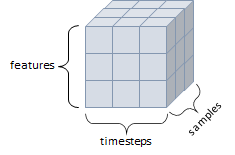

In [ ]:
t3 = torch.tensor()
print(t3.ndim)
print(t3.shape)
print(t3)

4D Tensor

* 4개의 축
* 컬러 이미지 데이터가 대표적인 사례 (흑백 이미지 데이터는 3D Tensor로 가능)
* 주로 샘플(samples), 높이(height), 너비(width), 컬러 채널(channel)을 가진 구조로 사용

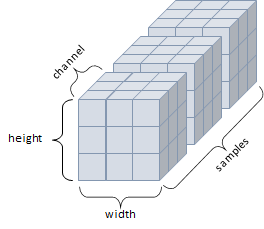

5D Tensor

* 5개의 축
* 비디오 데이터가 대표적인 사례
* 주로 샘플(samples), 프레임(frames), 높이(height), 너비(width), 컬러 채널(channel)을 가진 구조로 사용

### 텐서의 연산(Operations)

* 텐서에 대한 수학 연산, 삼각함수, 비트 연산, 비교 연산, 집계 등 제공

In [ ]:
import math

In [ ]:
print(a)
print(torch.abs(a))
print(torch.clamp(a,-0.5,0.5))

In [ ]:
print(a)
print(torch.min(a))
print(torch.max(a))
print(torch.mean(a))
print(torch.std(a))
print(torch.unique(torch.tensor([1,2,3,1,2,2])))

`max`와 `min`은 `dim` 인자를 줄 경우 argmax와 argmin도 함께 리턴
- argmax: 최대값을 가진 인덱스
- argmin: 최소값을 가진 인덱스



In [ ]:
x = torch.rand(2,2) 
print(x)
print(x.max(dim=0)) 
print(x.max(dim=1)) 

tensor([[0.0392, 0.2824],
        [0.3766, 0.5897]])
torch.return_types.max(
values=tensor([0.3766, 0.5897]),
indices=tensor([1, 1]))
torch.return_types.max(
values=tensor([0.2824, 0.5897]),
indices=tensor([1, 1]))


`torch.add`: 덧셈

In [ ]:
x = torch.rand(2,2)
y = torch.rand(2,2)

In [ ]:
print(x + y)
print(torch.add(x,y))

`in-place` 방식
  - in-place방식으로 텐서의 값을 변경하는 연산 뒤에는 _''가 붙음
  - `x.copy_(y), x.t_()`

In [ ]:
print(x)
print(y)
y.add_(x) # x값이 더해짐
print(y)

`torch.sub`: 뺄셈

`torch.mul`: 곱셉

`torch.div`: 나눗셈

`torch.mm`: 내적(dot product)

In [ ]:
print(torch.matmul(x,y))
print(torch.mm(x,y))
print(x.mm(y))

tensor([[2.1130, 2.1413],
        [2.4119, 2.4373]])
tensor([[2.1130, 2.1413],
        [2.4119, 2.4373]])
tensor([[2.1130, 2.1413],
        [2.4119, 2.4373]])


In [ ]:
z = torch.mm(x,y)
print(z)
print(torch.svd(z)) # 행렬 분해

tensor([[2.1130, 2.1413],
        [2.4119, 2.4373]])
torch.return_types.svd(
U=tensor([[-0.6595, -0.7517],
        [-0.7517,  0.6595]]),
S=tensor([4.5616e+00, 3.2420e-03]),
V=tensor([[-0.7030,  0.7112],
        [-0.7112, -0.7030]]))


### 텐서의 조작(Manipulations)

인덱싱(Indexing): NumPy처럼 인덱싱 형태로 사용가능

In [ ]:
x = torch.Tensor([[1,2],
                  [3,4]])
print(x)
print(x[0,0])
print(x[0,1])
print(x[1,0])
print(x[1,1])

tensor([[1., 2.],
        [3., 4.]])
tensor(1.)
tensor(2.)
tensor(3.)
tensor(4.)


`view`: 텐서의 크기(size)나 모양(shape)을 변경

- 기본적으로 변경 전과 후에 텐서 안의 원소 개수가 유지되어야 함
- -1로 설정되면 계산을 통해 해당 크기값을 유추

In [ ]:
x = torch.rand(4,5)
print(x)

tensor([[0.6421, 0.0418, 0.9602, 0.1967, 0.9562],
        [0.3495, 0.2012, 0.0999, 0.3442, 0.7019],
        [0.3865, 0.9180, 0.2866, 0.0306, 0.1574],
        [0.4127, 0.7784, 0.5655, 0.6638, 0.8621]])


`item`: 텐서에 값이 단 하나라도 존재하면 숫자값을 얻을 수 있음


In [ ]:
x = torch.randn(1)
print(x)
print(x.item())
print(x.dtype)

tensor([0.6622])
0.6622304916381836
torch.float32


스칼라값 하나만 존재해야 `item()` 사용 가능

In [ ]:
x = torch.randn(2)
print(x)
print(x.item())
print(x.dtype)

tensor([-1.3978, -1.4173])


ValueError: ignored

`squeeze`: 차원을 축소(제거)

In [ ]:
tensor = torch.rand(1,3,3)
print(tensor)
print(tensor.shape)

tensor([[[0.6832, 0.8483, 0.9484],
         [0.7104, 0.2122, 0.6048],
         [0.7207, 0.1905, 0.4195]]])
torch.Size([1, 3, 3])


`unsqueeze`: 차원을 증가(생성)

In [ ]:
t = torch.rand(3,3)
print(t)
print(t.shape)

tensor([[0.9654, 0.0956, 0.0425],
        [0.0367, 0.2689, 0.1990],
        [0.2843, 0.3053, 0.9906]])
torch.Size([3, 3])


`stack`: 텐서간 결합

In [ ]:
x = torch.FloatTensor([1,4])
y = torch.FloatTensor([2,5])
z = torch.FloatTensor([3,6])

In [ ]:
print(torch.stack([x,y,z]))

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


`cat`: 텐서를 결합하는 메소드(concatenate)

- 넘파이의 `stack`과 유사하지만, 쌓을 `dim`이 존재해야함
- 해당 차원을 늘려준 후 결합


In [ ]:
a = torch.randn(1,3,3)
print(a)
b = torch.randn(1,3,3)
print(b)
c = torch.cat((a,b), dim=0)
print(c)
print(c.size())

tensor([[[ 0.3754,  1.7948, -0.3136],
         [-1.9942, -1.3139,  0.8362],
         [-0.0146, -0.5111, -0.9375]]])
tensor([[[-1.4173, -1.0793, -1.5243],
         [-0.2368, -0.3814,  0.9378],
         [-1.3682, -0.6972,  0.1583]]])
tensor([[[ 0.3754,  1.7948, -0.3136],
         [-1.9942, -1.3139,  0.8362],
         [-0.0146, -0.5111, -0.9375]],

        [[-1.4173, -1.0793, -1.5243],
         [-0.2368, -0.3814,  0.9378],
         [-1.3682, -0.6972,  0.1583]]])
torch.Size([2, 3, 3])


In [ ]:
c = torch.cat((a,b), dim=1)
print(c)
print(c.size())

tensor([[[ 0.3754,  1.7948, -0.3136],
         [-1.9942, -1.3139,  0.8362],
         [-0.0146, -0.5111, -0.9375],
         [-1.4173, -1.0793, -1.5243],
         [-0.2368, -0.3814,  0.9378],
         [-1.3682, -0.6972,  0.1583]]])
torch.Size([1, 6, 3])


In [ ]:
c = torch.cat((a,b), dim=2)
print(c)
print(c.size())

tensor([[[ 0.3754,  1.7948, -0.3136, -1.4173, -1.0793, -1.5243],
         [-1.9942, -1.3139,  0.8362, -0.2368, -0.3814,  0.9378],
         [-0.0146, -0.5111, -0.9375, -1.3682, -0.6972,  0.1583]]])
torch.Size([1, 3, 6])


`chunk`: 텐서를 여러 개로 나눌 때 사용 (몇 개로 나눌 것인가?)

In [ ]:
tensor = torch.rand(3,6)
print(tensor)

tensor([[0.2088, 0.1907, 0.0180, 0.2219, 0.5393, 0.1299],
        [0.6829, 0.8879, 0.5292, 0.9939, 0.3080, 0.5350],
        [0.2623, 0.3082, 0.1428, 0.3798, 0.9149, 0.8505]])


In [ ]:
t1,t2,t3 = torch.chunk(tensor, 3, dim=1)
print(t1)
print(t2)
print(t3)

tensor([[0.5214, 0.1478],
        [0.8248, 0.3860],
        [0.4154, 0.3630]])
tensor([[0.3484, 0.9160],
        [0.0819, 0.4468],
        [0.6979, 0.9874]])
tensor([[0.0192, 0.2175],
        [0.4293, 0.4137],
        [0.0611, 0.6154]])


torch ↔ numpy
- Torch Tensor(텐서)를 NumPy array(배열)로 변환 가능
  - `numpy()`
  - `from_numpy()`
- Tensor가 CPU상에 있다면 NumPy 배열은 메모리 공간을 공유하므로 하나가 변하면, 다른 하나도 변함

In [ ]:
a = torch.ones(7) 
print(a)

tensor([1., 1., 1., 1., 1., 1., 1.])


In [ ]:
b = a.numpy()
print(b)

[1. 1. 1. 1. 1. 1. 1.]


In [ ]:
a.add_(1) 
print(a) 
print(b)

tensor([2., 2., 2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2. 2. 2.]


In [ ]:
import numpy as np

a = np.ones(7)
b = torch.from_numpy(a)
np.add(a,1,out=a) 
print(a)
print(b)

[2. 2. 2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2., 2., 2.], dtype=torch.float64)


## Autograd(자동미분)

- 신경망을 학습할 때 가장 자주 사용되는 알고리즘은 역전파

- `torch.autograd` 패키지는 Tensor의 모든 연산에 대해 **자동 미분** 제공
- 이는 코드를 어떻게 작성하여 실행하느냐에 따라 역전파가 정의된다는 뜻
- `backprop`를 위해 미분값을 자동으로 계산

- `requires_grad` 속성을 `True`로 설정하면, 해당 텐서에서 이루어지는 모든 연산들을 추적하기 시작

In [ ]:
import torch
x = torch.ones(5)  # input tensor
y = torch.zeros(3)  # expected output
w = torch.randn(5, 3, requires_grad=True) # 최적화 해야하는 매개변수
b = torch.randn(3, requires_grad=True) # 최적화 해야하는 매개변수
z = torch.matmul(x, w)+b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

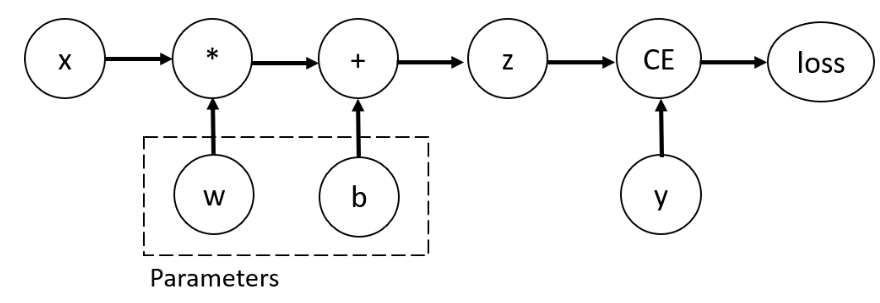

이 신경망에서, w와 b는 최적화를 해야 하는 매개변수입니다. 따라서 이러한 변수들에 대한 손실 함수의 변화도를 계산할 수 있어야 합니다. 이를 위해서 해당 텐서에 requires_grad 속성을 설정합니다.

# 변화도(Gradient) 계산하기

신경망에서 매개변수의 가중치를 최적화하려면 매개변수에 대한 손실함수의 도함수(derivative)를 계산해야 합니다. 

In [ ]:
loss.backward()
print(w.grad)
print(b.grad)

tensor([[0.2218, 0.3320, 0.2861],
        [0.2218, 0.3320, 0.2861],
        [0.2218, 0.3320, 0.2861],
        [0.2218, 0.3320, 0.2861],
        [0.2218, 0.3320, 0.2861]])
tensor([0.2218, 0.3320, 0.2861])


- 연산 그래프의 잎(leaf) 노드들 중 `requires_grad` 속성이 `True`로 설정된 노드들의 grad 속성만 구할 수 있습니다. 그래프의 다른 모든 노드에서는 변화도가 유효하지 않습니다.

- 성능 상의 이유로, 주어진 그래프에서의 `backward`를 사용한 변화도 계산은 한 번만 수행할 수 있습니다. 만약 동일한 그래프에서 여러번의 `backward` 호출이 필요하면, `backward` 호출 시에 `retrain_graph=True`를 전달해야 합니다.

# 변화도 추적 멈추기

기본적으로, `requires_grad=True`인 모든 텐서들은 연산 기록을 추적하고 변화도 계산을 지원합니다. 그러나 모델을 학습한 뒤 입력 데이터를 단순히 적용하기만 하는 경우와 같이 순전파 연산만 필요한 경우에는, 이러한 추적이나 지원이 필요없을 수 있습니다. 연산 코드를 `torch.no_grad()` 블록으로 둘러싸서 연산 추적을 멈출 수 있습니다:

In [ ]:
z = torch.matmul(x, w)+b
print(z.requires_grad)

with torch.no_grad():
    z = torch.matmul(x, w)+b
print(z.requires_grad)

True
False


동일한 결과를 얻는 다른 방법은 텐서에 `detach()` 메소드를 사용하는 것

In [ ]:
z = torch.matmul(x, w)+b
z_det = z.detach()
print(z_det.requires_grad)

False


변화도 추적을 멈춰야 하는 이유들은 다음과 같습니다:
- 신경망의 일부 매개변수를 고정된 매개변수(frozen parameter)로 표시합니다. 이는 사전 학습된 신경망을 미세조정 할 때 매우 일반적인 시나리오입니다.

- 변화도를 추적하지 않는 텐서의 연산이 더 효율적이기 때문에, 순전파 단계만 수행할 때 연산 속도가 향상됩니다.-

## 데이터 준비

파이토치에서는 데이터 준비를 위해 `torch.utils.data`의 `Dataset`과 `DataLoader` 사용 가능

- `Dataset`에는 다양한 데이터셋이 존재 (MNIST, FashionMNIST, CIFAR10, ...)
  - Vision Dataset: https://pytorch.org/vision/stable/datasets.html
  - Text Dataset: https://pytorch.org/text/stable/datasets.html
  - Audio Dataset: https://pytorch.org/audio/stable/datasets.html
- `DataLoader`와 `Dataset`을 통해 `batch_size`, `train` 여부, `transform` 등을 인자로 넣어 데이터를 어떻게 load할 것인지 정해줄 수 있음

In [ ]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from torch import nn
from torch.utils.data import DataLoader

토치비전(`torchvision`)은 파이토치에서 제공하는 데이터셋들이 모여있는 패키지

- `transforms`: 전처리할 때 사용하는 메소드 (https://pytorch.org/docs/stable/torchvision/transforms.html)
- `transforms`에서 제공하는 클래스 이외는 일반적으로 클래스를 따로 만들어 전처리 단계를 진행


In [ ]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



`Dataset` 에 리스트(list)처럼 직접 접근(index)할 수 있음

 `training_data[index]`. `matplotlib` 을 사용하여 학습 데이터의 일부를 시각화하기

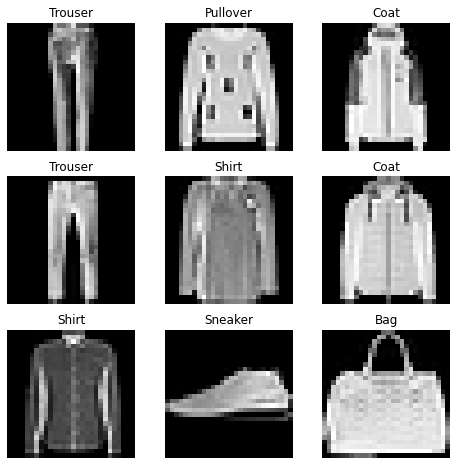

In [ ]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

`Dataset` 을 `DataLoader` 의 인자로 전달합니다. 이는 데이터셋을 순회 가능한 객체(iterable)로 감싸고, 자동화된 배치(batch), 샘플링(sampling), 섞기(shuffle) 및 다중 프로세스로 데이터 불러오기(multiprocess data loading)를 지원합니다. 여기서는 배치 크기(batch size)를 64로 정의합니다. 즉, 데이터로더(dataloader) 객체의 각 요소는 64개의 특징(feature)과 정답(label)을 묶음(batch)으로 반환합니다.

In [ ]:
batch_size = 64

# 데이터로더 생성
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


# 모델만들기

PyTorch에서 신경망 모델은 nn.Module 을 상속받는 클래스(class)를 생성하여 정의합니다. `__init__` 함수에서 신경망의 계층(layer)들을 정의하고 `forward` 함수에서 신경망에 데이터를 어떻게 전달할지 지정합니다. 가능한 경우 GPU로 신경망을 이동시켜 연산을 가속(accelerate)합니다.

In [ ]:
# GPU
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

Using cuda device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


# 모델 매개변수 최적화하기

모델을 학습하려면 손실 함수(loss function) 와 옵티마이저(optimizer) 가 필요

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [ ]:
# 각 학습 단계(training loop)에서 모델은 (배치(batch)로 제공되는) 학습 데이터셋에 대한 예측을 수행하고, 
# 예측 오류를 역전파하여 모델의 매개변수를 조정합니다.

def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # 예측 오류 계산
        pred = model(X)
        loss = loss_fn(pred, y)

        # 역전파
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [ ]:
#모델이 학습하고 있는지를 확인하기 위해 테스트 데이터셋으로 모델의 성능을 확인
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

학습 단계는 여러번의 반복 단계 (에폭(epochs)) 를 거쳐서 수행됩니다. 각 에폭에서는 모델은 더 나은 예측을 하기 위해 매개변수를 학습합니다. 각 에폭마다 모델의 정확도(accuracy)와 손실(loss)을 출력합니다; 에폭마다 정확도가 증가하고 손실이 감소하는 것을 보려고 합니다.

In [ ]:
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.308330  [    0/60000]
loss: 2.293197  [ 6400/60000]
loss: 2.271720  [12800/60000]
loss: 2.264009  [19200/60000]
loss: 2.244643  [25600/60000]
loss: 2.214997  [32000/60000]
loss: 2.224468  [38400/60000]
loss: 2.185752  [44800/60000]
loss: 2.184716  [51200/60000]
loss: 2.151780  [57600/60000]
Test Error: 
 Accuracy: 40.4%, Avg loss: 2.147874 

Epoch 2
-------------------------------
loss: 2.158303  [    0/60000]
loss: 2.146271  [ 6400/60000]
loss: 2.086207  [12800/60000]
loss: 2.102017  [19200/60000]
loss: 2.051672  [25600/60000]
loss: 1.987016  [32000/60000]
loss: 2.011293  [38400/60000]
loss: 1.932387  [44800/60000]
loss: 1.939376  [51200/60000]
loss: 1.856254  [57600/60000]
Test Error: 
 Accuracy: 54.0%, Avg loss: 1.863896 

Epoch 3
-------------------------------
loss: 1.899227  [    0/60000]
loss: 1.866145  [ 6400/60000]
loss: 1.748640  [12800/60000]
loss: 1.786550  [19200/60000]
loss: 1.677355  [25600/60000]
loss: 1.628768  [32000/600

# 모델 저장하기

PyTorch 모델은 학습한 매개변수를 `state_dict`라고 불리는 내부 상태 사전(internal state dictionary)에 저장합니다. 이 상태 값들은 `torch.save` 메소드를 사용하여 저장(persist)할 수 있습니다:

In [ ]:
torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


# 모델 불러오기

In [ ]:
model = NeuralNetwork()
model.load_state_dict(torch.load("model.pth"))

<All keys matched successfully>

In [ ]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

model.eval()
x, y = test_data[0][0], test_data[0][1]
with torch.no_grad():
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')

Predicted: "Ankle boot", Actual: "Ankle boot"


출처 www.suanlab.com
https://tutorials.pytorch.kr/beginner/basics/tensorqs_tutorial.html